In [1]:
from phi.torch.flow import*
import matplotlib.pyplot as plt
import copy

In [2]:
def potential_func(tracj : Tensor):
    x2y2 = torch.square(tracj) # [x ^ 2, y ^ 2]
    x2y2_sum = torch.sum(x2y2, 1) # [x ^ 2 + y ^ 2]
    x2y2_subs = torch.sub(x2y2_sum, torch.Tensor([1.])) # [x ^ 2 + y ^ 2 -1]
    return torch.square(x2y2_subs)# [(x ^ 2 + y ^ 2 -1) ^ 2]

In [3]:
def path_simulator(starting_point, del_x, force_vec):
    num_steps = len(force_vec)
    traj = np.zeros((num_steps + 1, 2))
    traj[0] = starting_point
    for i in range(num_steps):
        traj[i + 1] = [traj[i][0] + del_x, traj[i][1] + force_vec[i]]
    return traj

In [4]:
def potential_loss(trajs: Tensor):
    potential_vals = potential_func(trajs)
    return torch.sum(potential_vals)

In [5]:
def gd_momentum(trajs, grad_func, lr = 0.001,  num_steps = 1000, beta = 0.2, momentum = .95):
    s1, _ = trajs.shape
    velocity = torch.zeros(s1 - 1)
    for i in range(num_steps):
        potential_val, (grad, ) = grad_func(trajs)
        # print(velocity.shape, grad.shape)
        velocity = momentum * velocity + lr * grad[1:, 1] # ∂L / ∂F learn only in y-direction
        trajs[1:, 1] -= velocity 
        if i % 100 == 0:
            # pass
            print(f"Potential Value: {potential_val}, iter: {i}")
    print(f"Final Potential Value: {potential_val}")
    return trajs

In [6]:
x0 = [-1, 0]
del_x = .1
N = 20
f_vec = [np.random.uniform(low = -.1, high = .1) for _ in range(N)]
traj_0 = path_simulator(x0, del_x, f_vec)
traj_0_copy = copy.copy(traj_0) # for plotting
traj_0 = torch.from_numpy(traj_0)

In [7]:
potential_grad = math.functional_gradient(potential_loss)

In [8]:
traj_final = gd_momentum(trajs = traj_0, lr= .1, num_steps= 1000 ,grad_func = potential_grad)

Potential Value: 9.378835678100586, iter: 0
Potential Value: 0.03559859097003937, iter: 100
Potential Value: 0.0002257035084767267, iter: 200
Potential Value: 1.1294916930637555e-06, iter: 300
Potential Value: 7.92402232718814e-09, iter: 400
Potential Value: 1.6421211057604523e-09, iter: 500
Potential Value: 1.4019043703683565e-09, iter: 600
Potential Value: 1.245201275423824e-09, iter: 700
Potential Value: 1.1142624600779527e-09, iter: 800
Potential Value: 1.005734162617955e-09, iter: 900
Final Potential Value: 9.097362863030867e-10


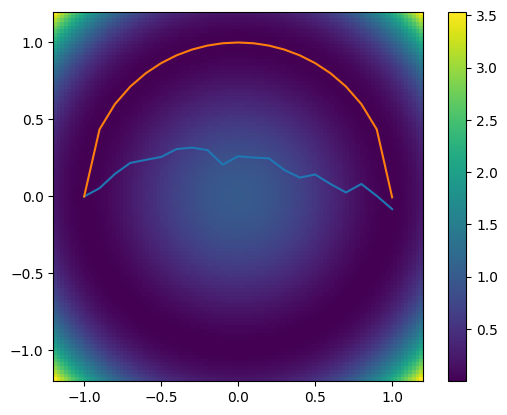

In [10]:
x,y = np.meshgrid(np.linspace(-1.2, 1.2, 100), np.linspace(-1.2, 1.2, 100))
z = (x ** 2 + y ** 2  - 1) ** 2
plt.imshow(z, extent = [-1.2, 1.2, -1.2, 1.2])
plt.plot(traj_0_copy[:, 0], traj_0_copy[:, 1], label = "intial trajectory")
plt.plot(traj_final[:, 0], traj_final[:, 1], label = "optimized trajectory")
plt.colorbar()